In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from logger import logger

### Load data

In [2]:
train = pd.read_csv('../data/train_split.csv')
val = pd.read_csv('../data/val_split.csv')

In [3]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

X_val = val.drop("Survived", axis=1)
y_val = val["Survived"]

In [4]:
def plot_roc(y_val, y_pred):
    fpr, tpr, roc_thresholds = roc_curve(y_val, y_pred)
    plt.figure(figsize=(5, 5))
    plt.grid()
    plt.plot(fpr, tpr, color='b')
    plt.title('ROC curve')
    
def plot_pr(y_val, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
    plt.figure(figsize=(15, 5))
    plt.grid()
    plt.plot(thresholds, precision[1:], color='r', label='Precision')
    plt.plot(thresholds, recall[1:], color='b', label='Recall')
    plt.gca().invert_xaxis()
    plt.legend()
    
def evaluate(y_val, y_pred):
    plot_roc(y_val, y_pred)
    plot_pr(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    logger.info(roc_auc)
    return roc_auc

### Train models

2020-07-19 03:52:59,743 - 0.8837837837837839


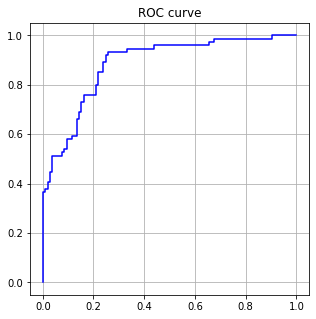

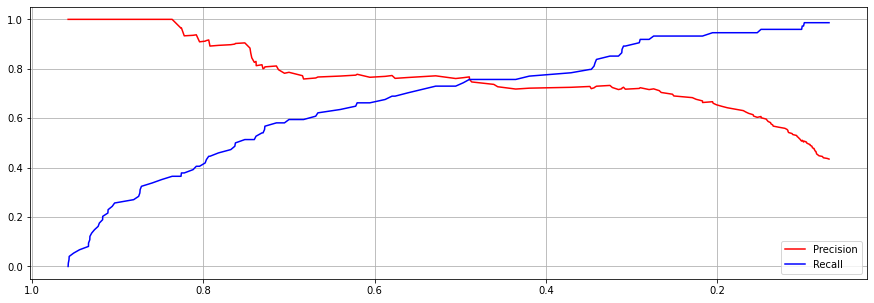

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
lr_auc = evaluate(y_val, y_pred)

2020-07-19 03:53:00,037 - 0.8643500643500643


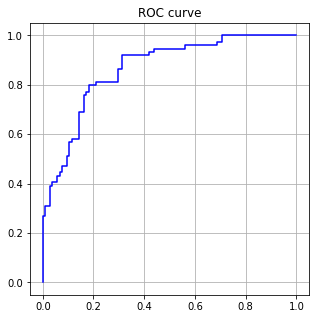

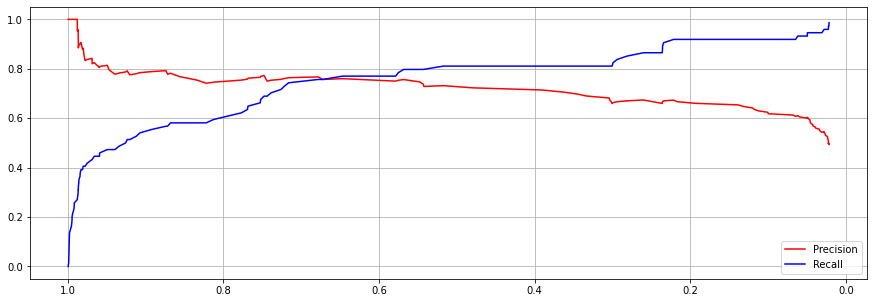

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
nb_auc = evaluate(y_val, y_pred)

2020-07-19 03:53:00,484 - 0.886036036036036


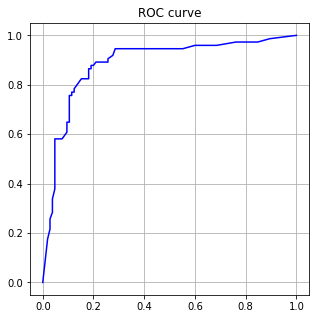

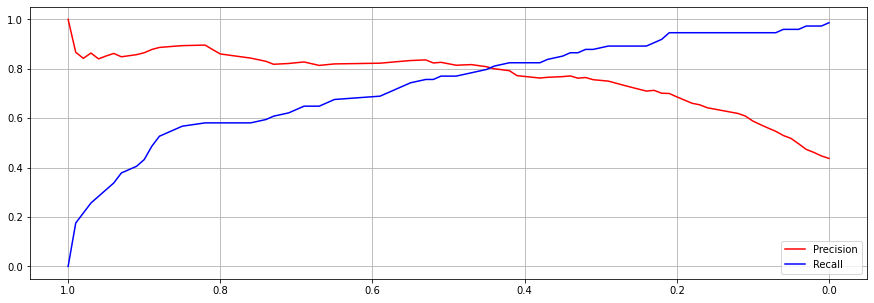

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
rf_auc = evaluate(y_val, y_pred)

2020-07-19 03:53:00,898 - 0.867052767052767


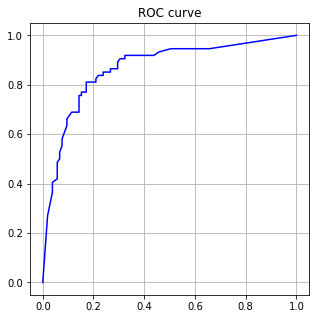

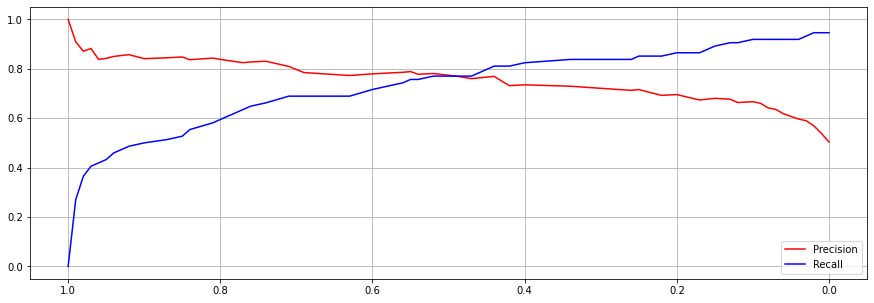

In [8]:
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
et_auc = evaluate(y_val, y_pred)

2020-07-19 03:53:01,273 - 0.8737451737451737


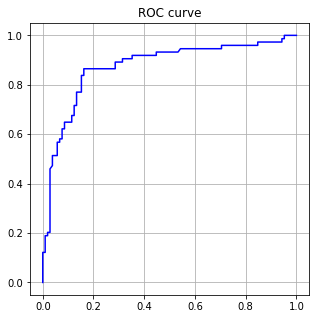

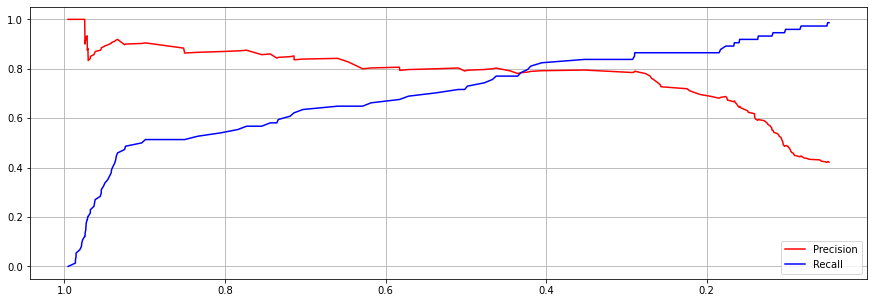

In [9]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
gbm_auc = evaluate(y_val, y_pred)

### Assert results are identical

In [10]:
assert lr_auc == 0.8837837837837839, 'Expected Logistic Regression AUC = 0.8837837837837839, Got {}'.format(lr_auc)
assert nb_auc == 0.8643500643500643, 'Expected Naive Bayes AUC = 0.8643500643500643, Got {}'.format(nb_auc)
assert rf_auc == 0.886036036036036, 'Expected Random Forest AUC = 0.886036036036036'.format(rf_auc)
assert et_auc == 0.867052767052767, 'Expected Extra Trees AUC = 0.867052767052767'.format(et_auc)
assert gbm_auc == 0.8737451737451737, 'Expected Gradient Boosted Trees AUC = 0.8737451737451737'.format(gbm_auc)

In [3]:
logger.info('Completed! All results validated')

2020-07-18 20:53:55,244 - Completed! All results validated
